# Part 1: Data Preprocessing

In [10]:
import pandas as pd

# File paths (assuming you already have them)
train_file_path = 'https://raw.githubusercontent.com/neilaxu/schulich_data_science/main/DS2/Assignment%201/test.csv'

# Load the CSV files with the correct delimiter (semicolon is assumed)
train_df = pd.read_csv(train_file_path, delimiter=';')



In [12]:
# Summary of the dataset (types and non-null values)
train_df.info()

# Check for missing values in each column
missing_values_train = train_df.isnull().sum()
print("Missing values per column in train data:\n", missing_values_train)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
Missing values per column in train data:
 age          0
job          0
marital      0
education   

In [13]:
# Summary statistics for numerical columns in the train data
numeric_summary_train = train_df.describe()
print("Summary statistics for numerical columns:\n", numeric_summary_train)

# Check the unique values and their counts for each categorical column in the train data
categorical_columns_train = train_df.select_dtypes(include=['object']).columns
for col in categorical_columns_train:
    print(f"Value counts for {col}:\n", train_df[col].value_counts(), "\n")
    
# Analyze the target column 'y'
target_distribution = train_df['y'].value_counts(normalize=True)
print("Distribution of the target variable 'y':\n", target_distribution)

Summary statistics for numerical columns:
                age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     8

In [14]:
print(train_df.shape)
train_df.head()

(4521, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


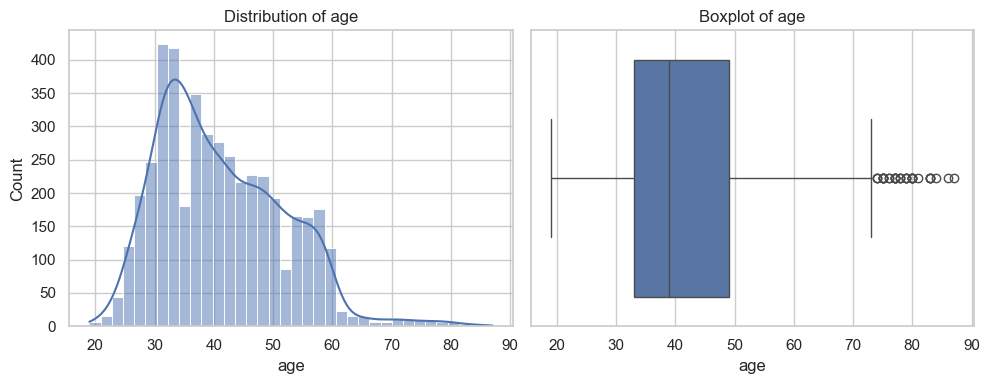

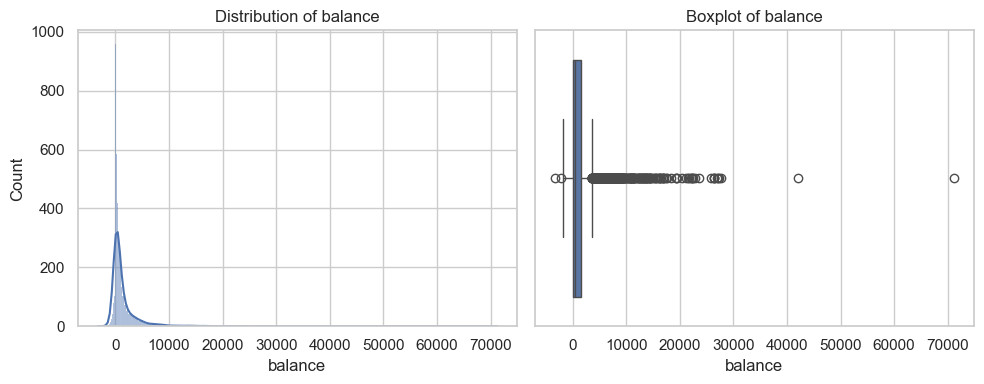

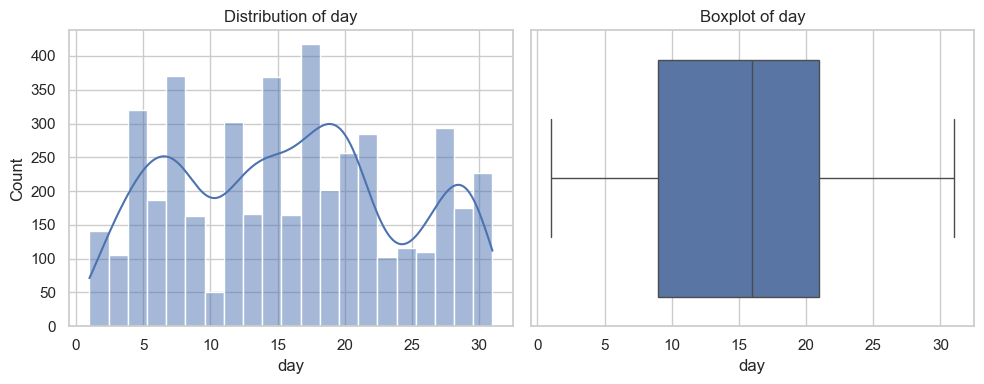

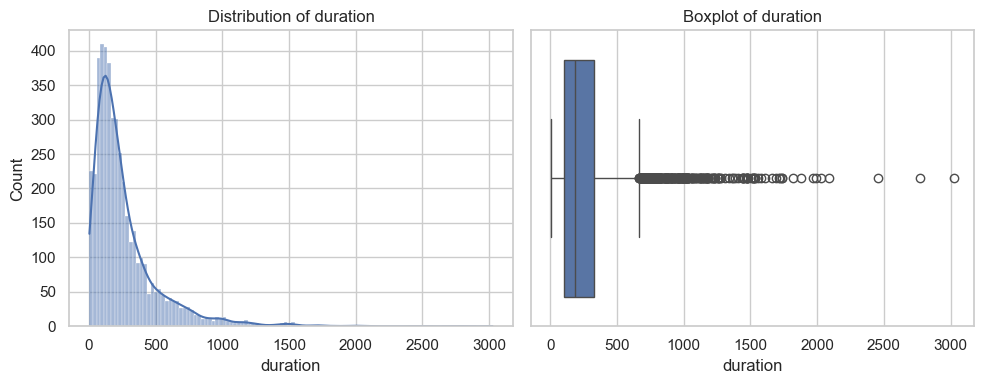

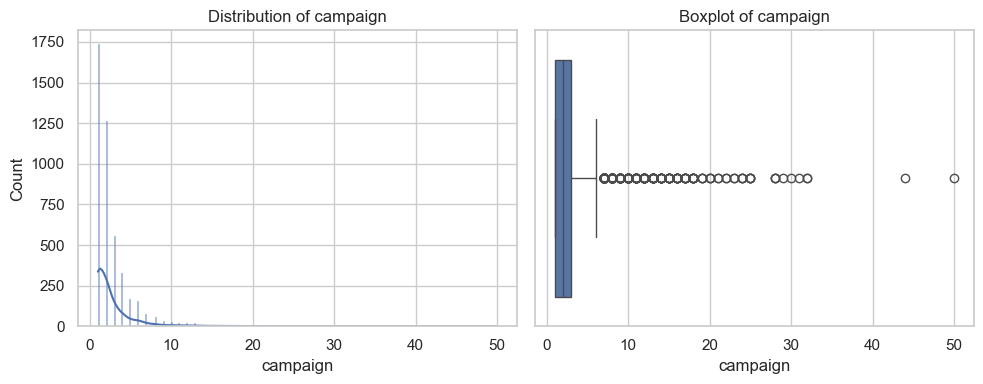

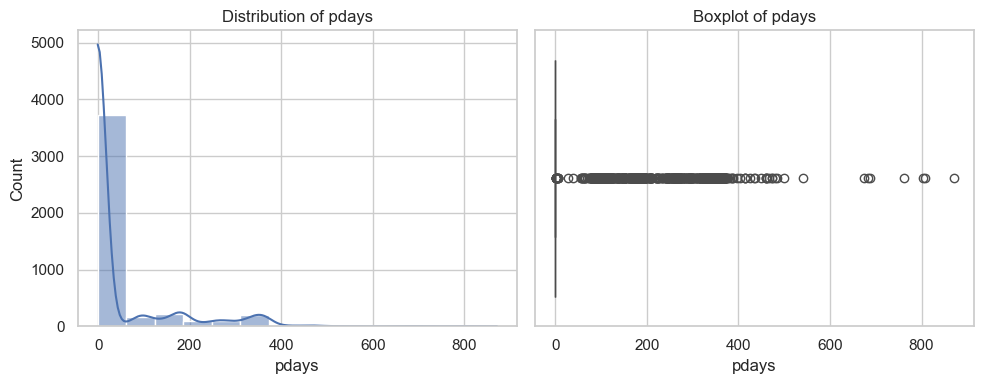

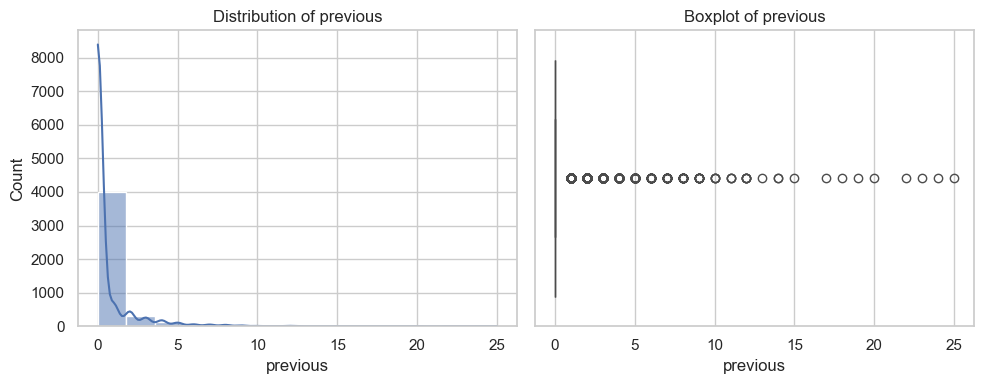

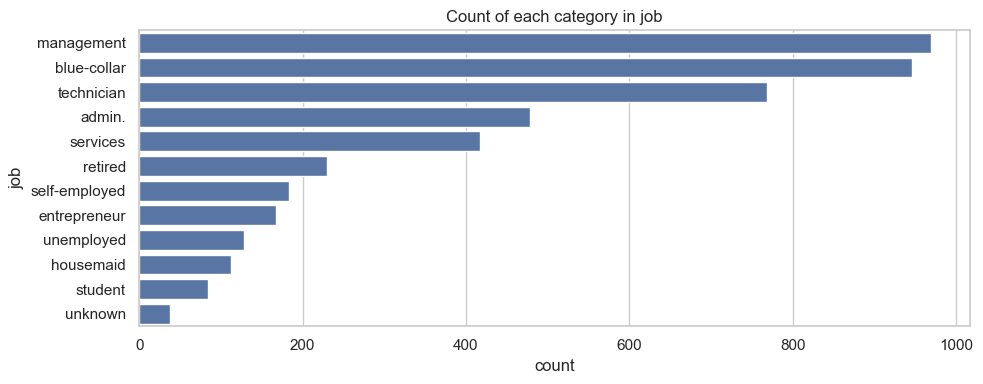

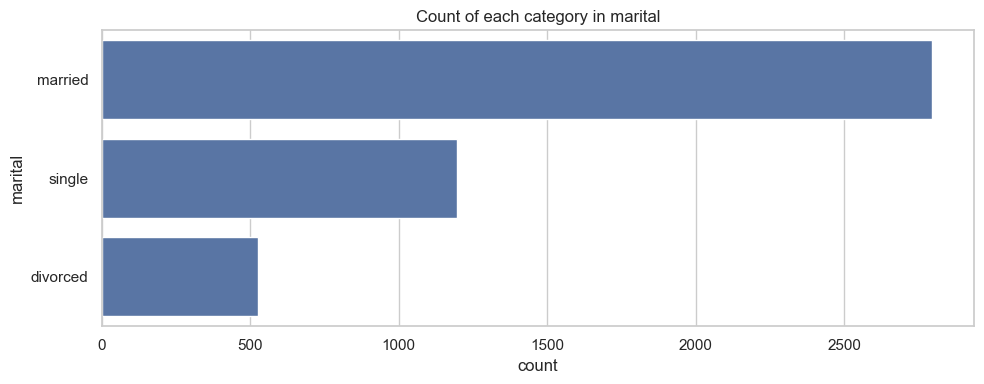

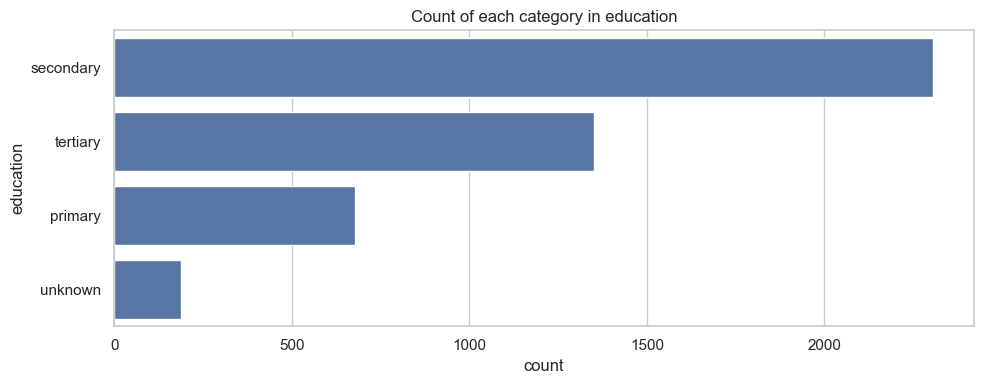

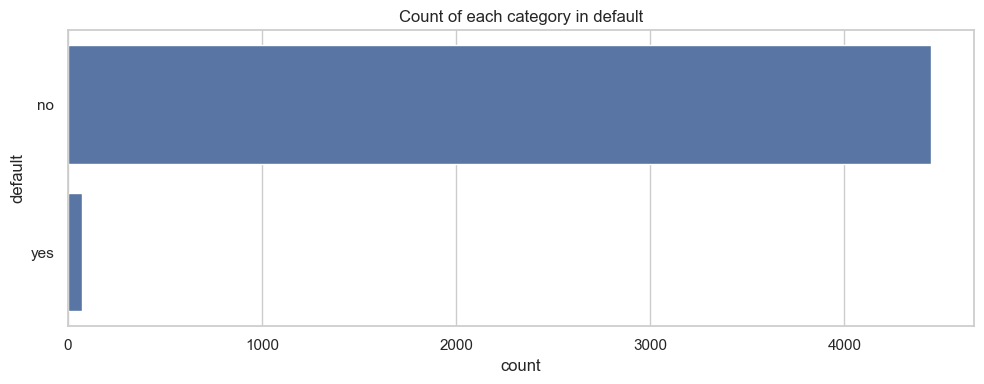

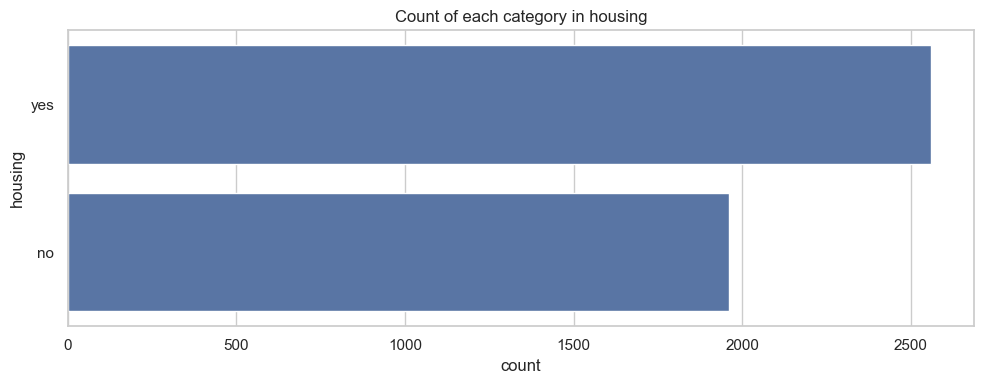

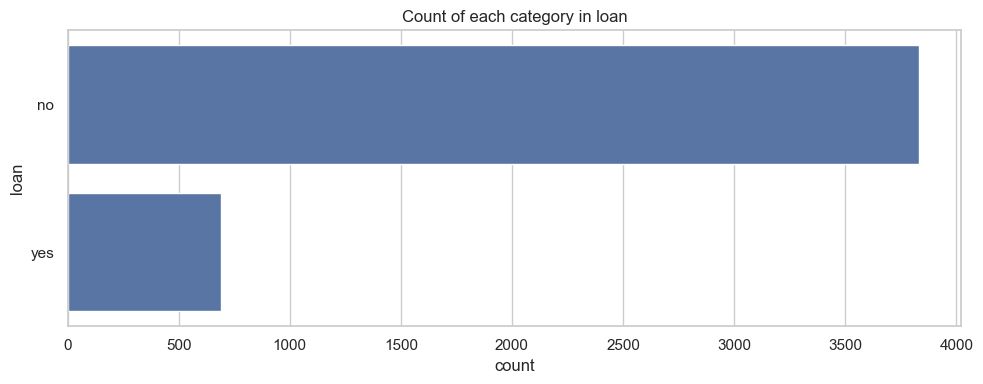

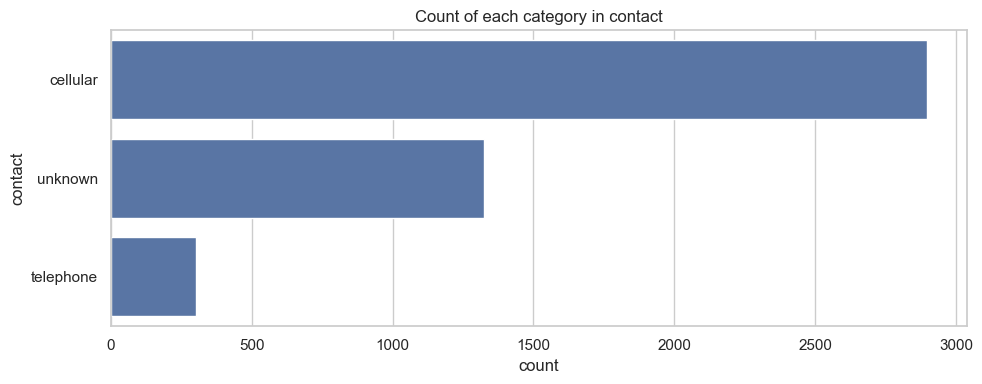

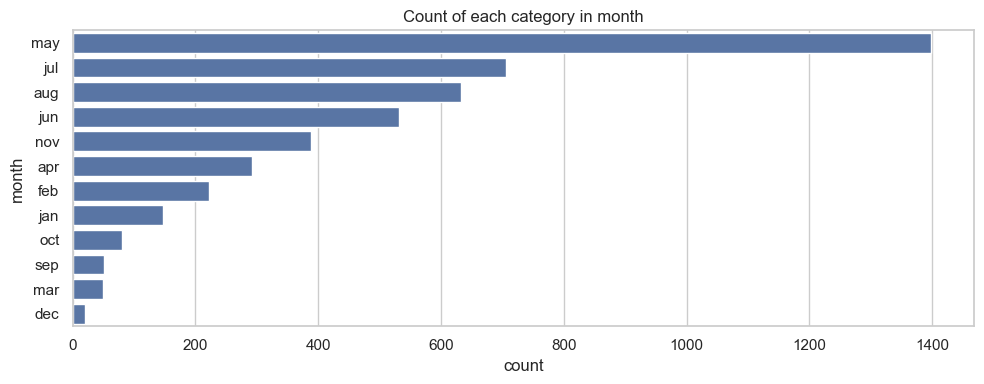

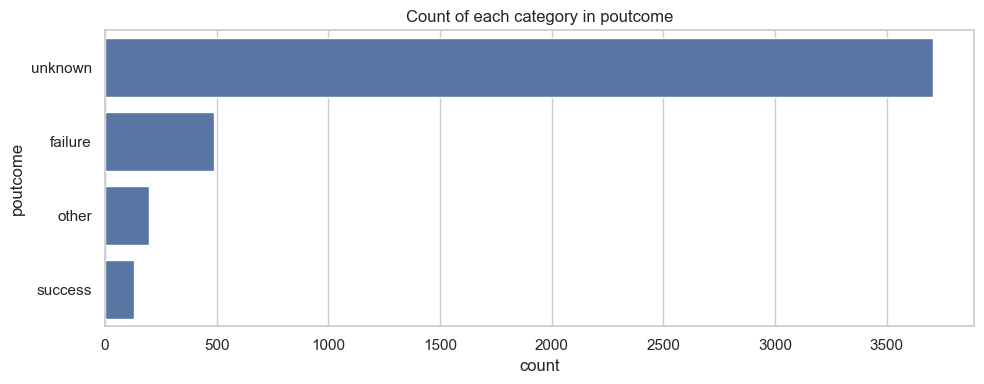

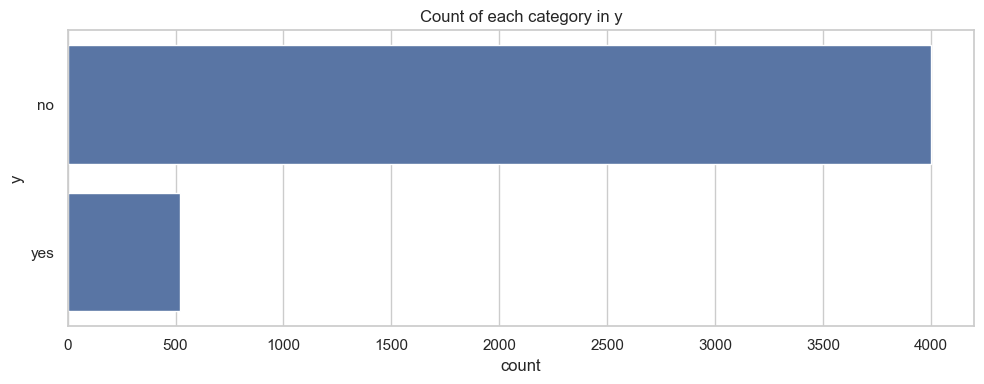

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Visualize numerical columns
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

# Visualize categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    
    # Bar plot
    sns.countplot(y=col, data=train_df, order=train_df[col].value_counts().index)
    plt.title(f'Count of each category in {col}')
    
    plt.tight_layout()
    plt.show()



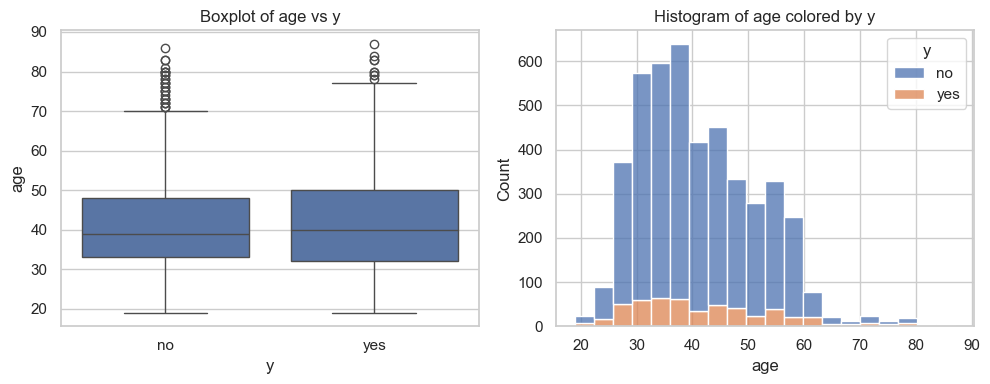

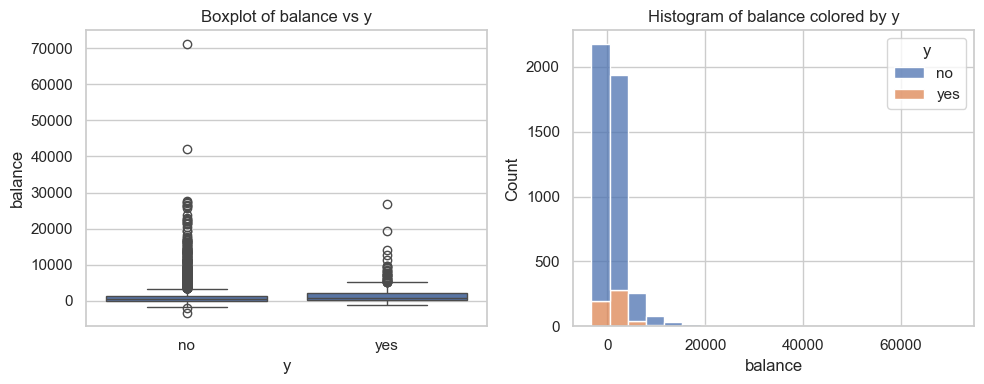

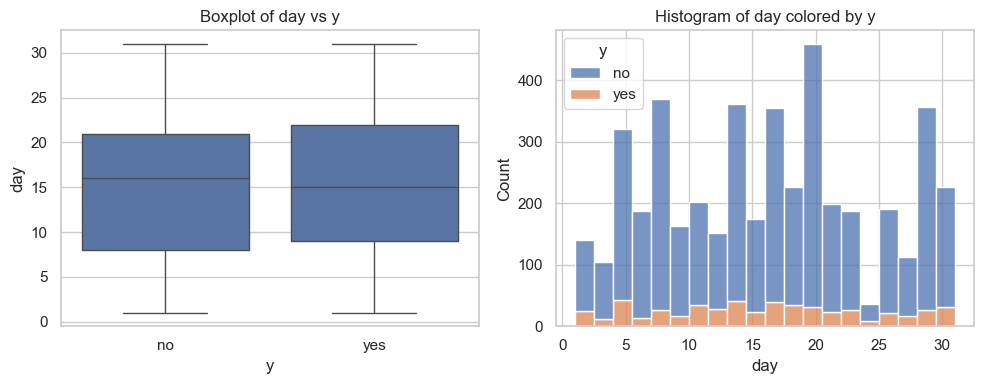

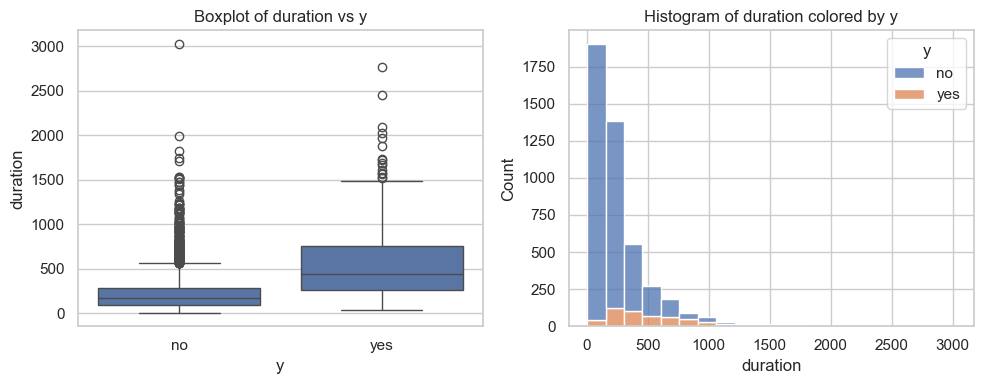

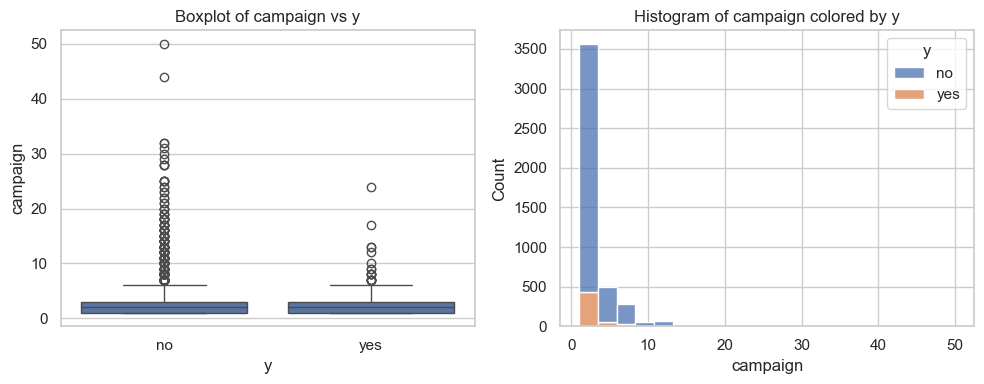

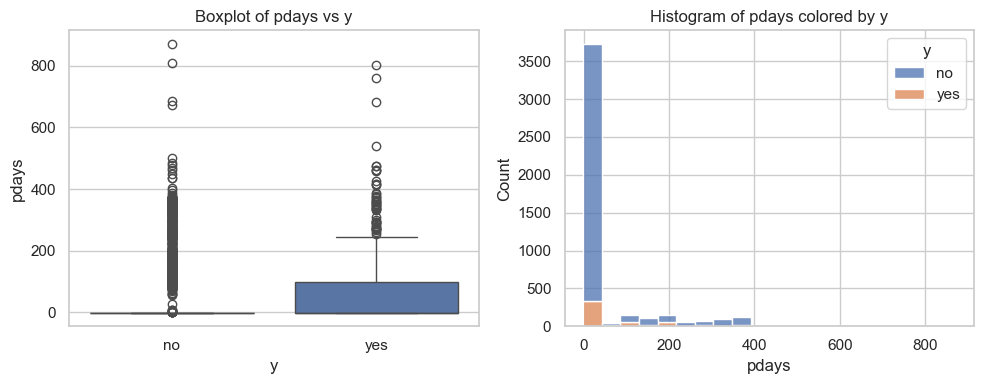

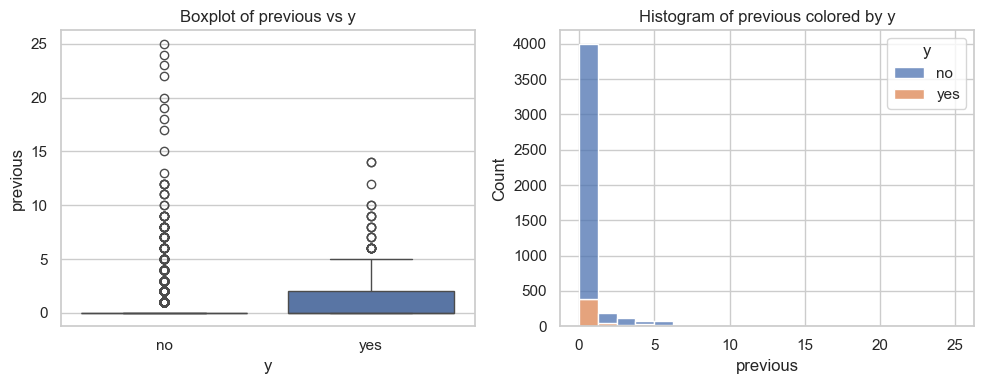

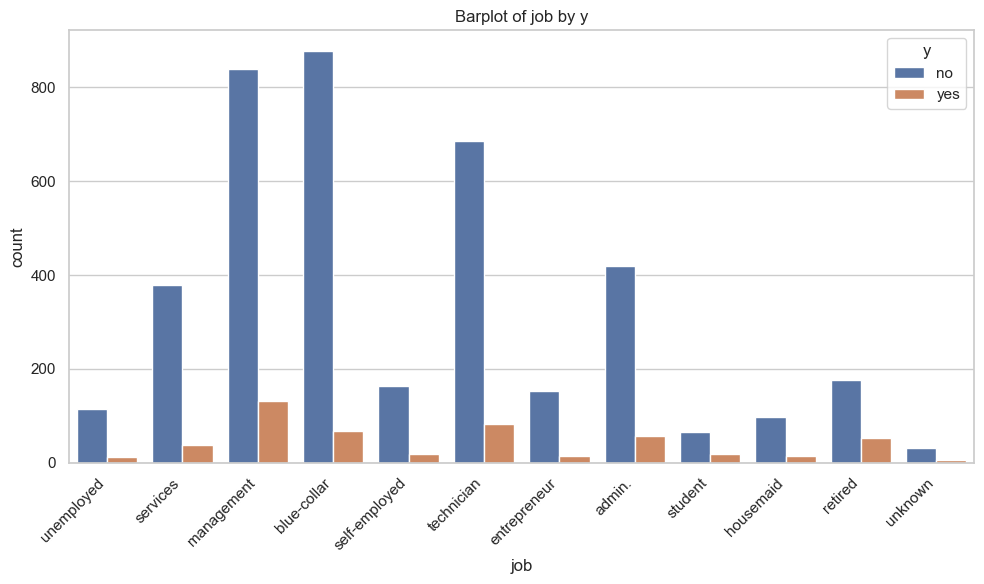

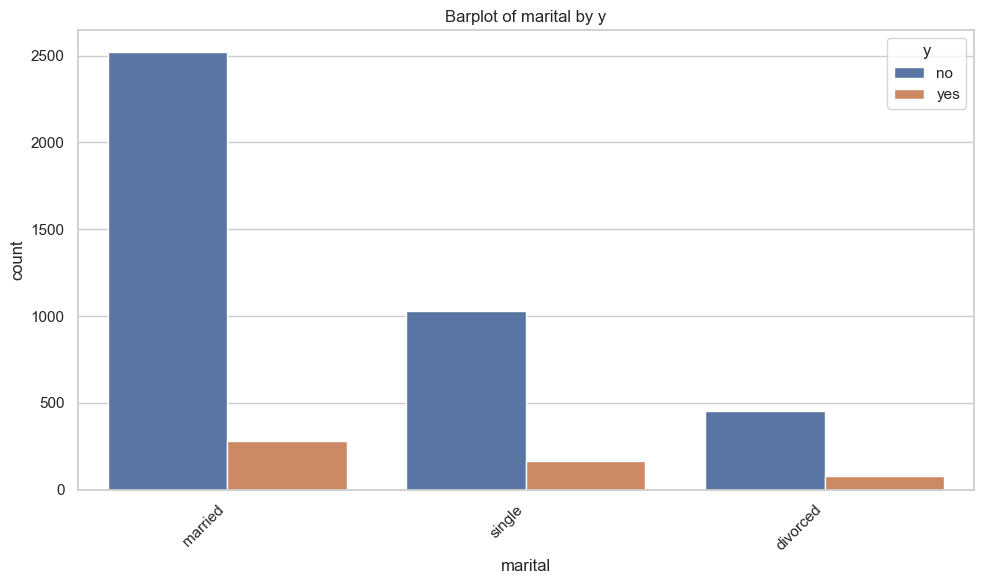

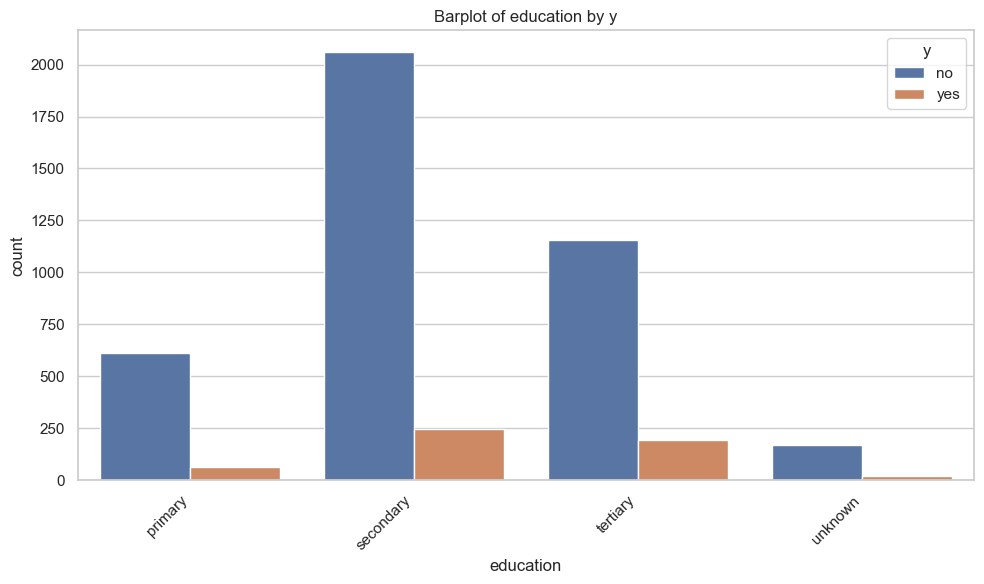

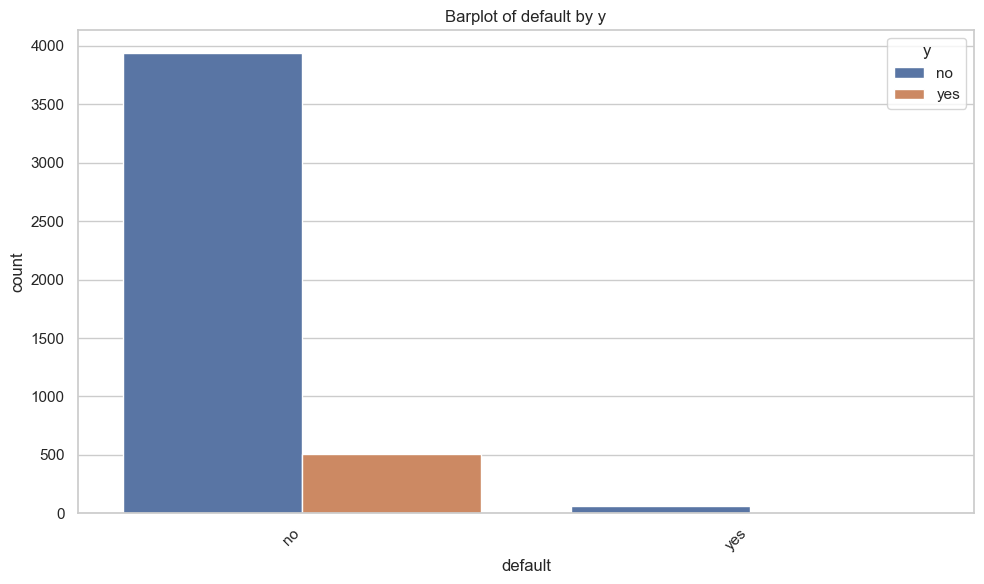

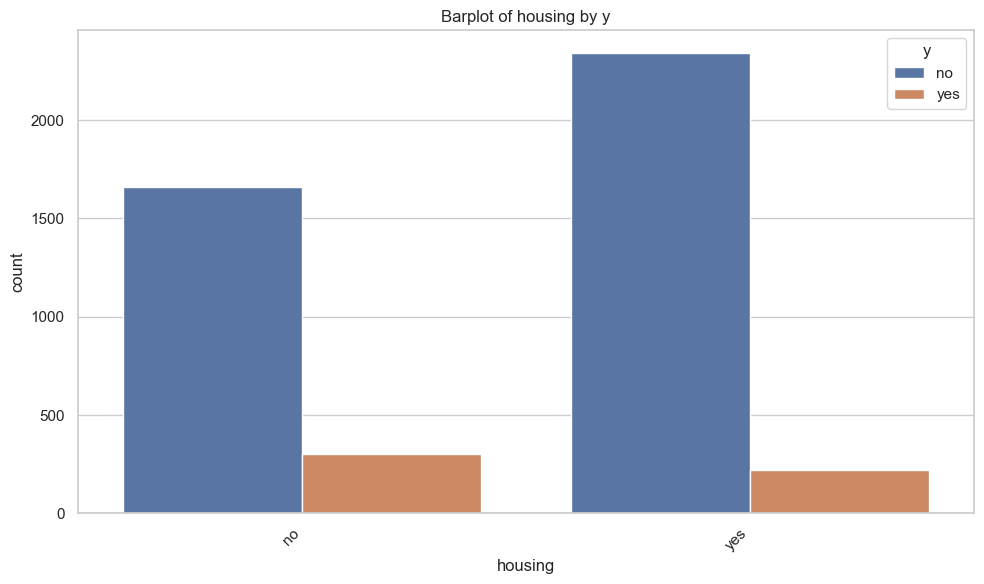

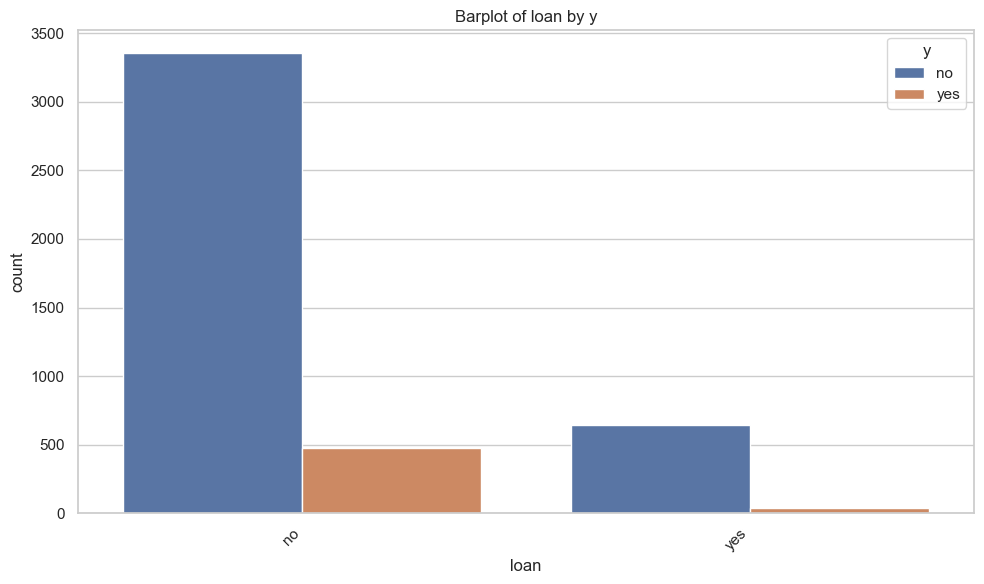

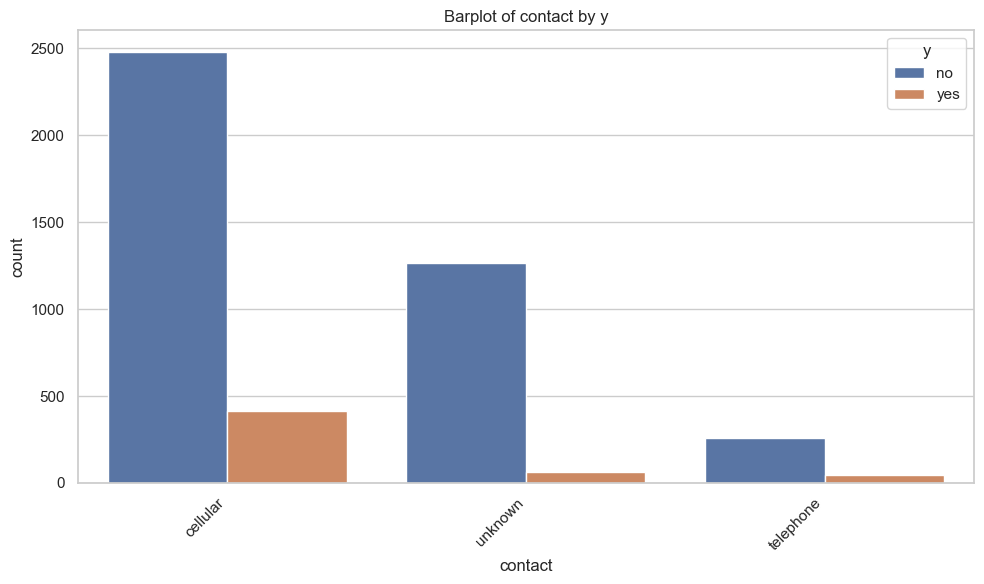

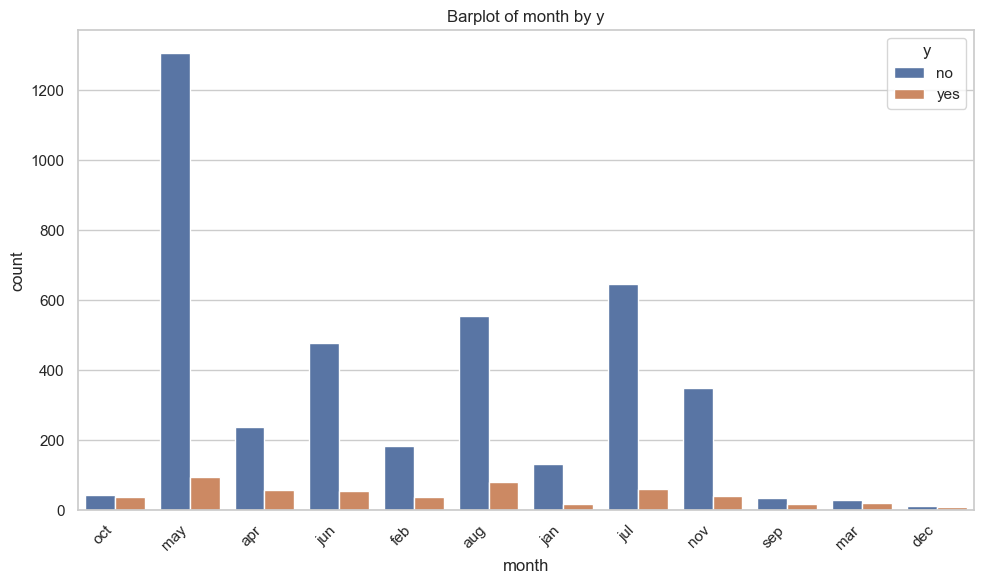

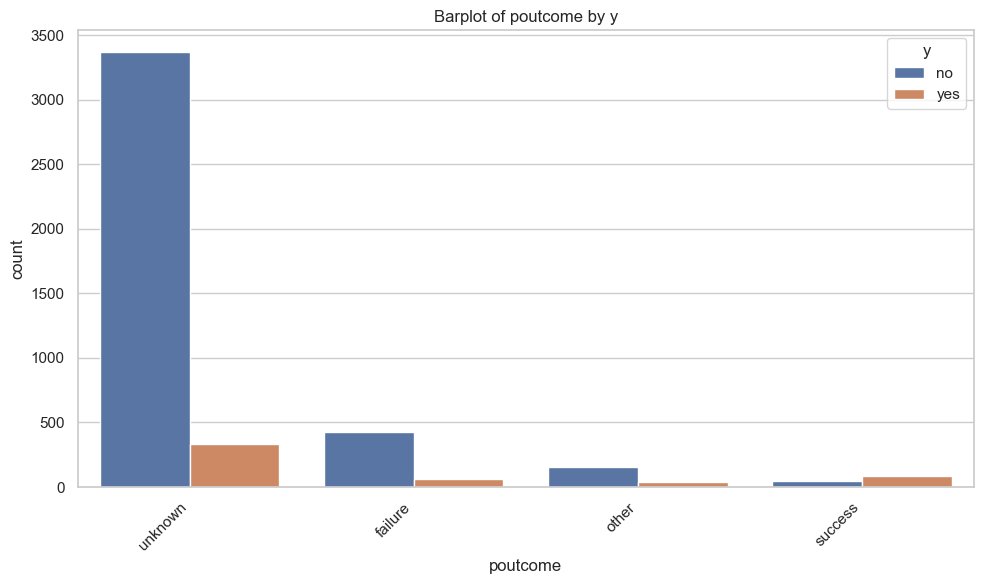

Correlation of numerical columns with target 'y':
 age         0.045092
balance     0.017905
day        -0.011244
duration    0.401118
campaign   -0.061147
pdays       0.104087
previous    0.116714
y_binary    1.000000
dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the target column 'y' to binary: 'yes' -> 1, 'no' -> 0
train_df['y_binary'] = train_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Numerical columns: boxplots and histograms
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    if col != 'y_binary':
        plt.figure(figsize=(10, 4))

        # Boxplot to show distribution for 'yes' and 'no' in 'y'
        plt.subplot(1, 2, 1)
        sns.boxplot(x='y', y=col, data=train_df)
        plt.title(f'Boxplot of {col} vs y')

        # Histogram to show distribution of the column
        plt.subplot(1, 2, 2)
        sns.histplot(data=train_df, x=col, hue='y', multiple='stack', bins=20)
        plt.title(f'Histogram of {col} colored by y')
        
        plt.tight_layout()
        plt.show()

# Categorical columns: barplots
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('y')  # Exclude the target column 'y'

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Barplot for categorical columns
    sns.countplot(x=col, hue='y', data=train_df)
    plt.title(f'Barplot of {col} by y')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Correlation of numerical columns with the target
correlation = train_df[numerical_columns].corrwith(train_df['y_binary'])
print("Correlation of numerical columns with target 'y':\n", correlation)


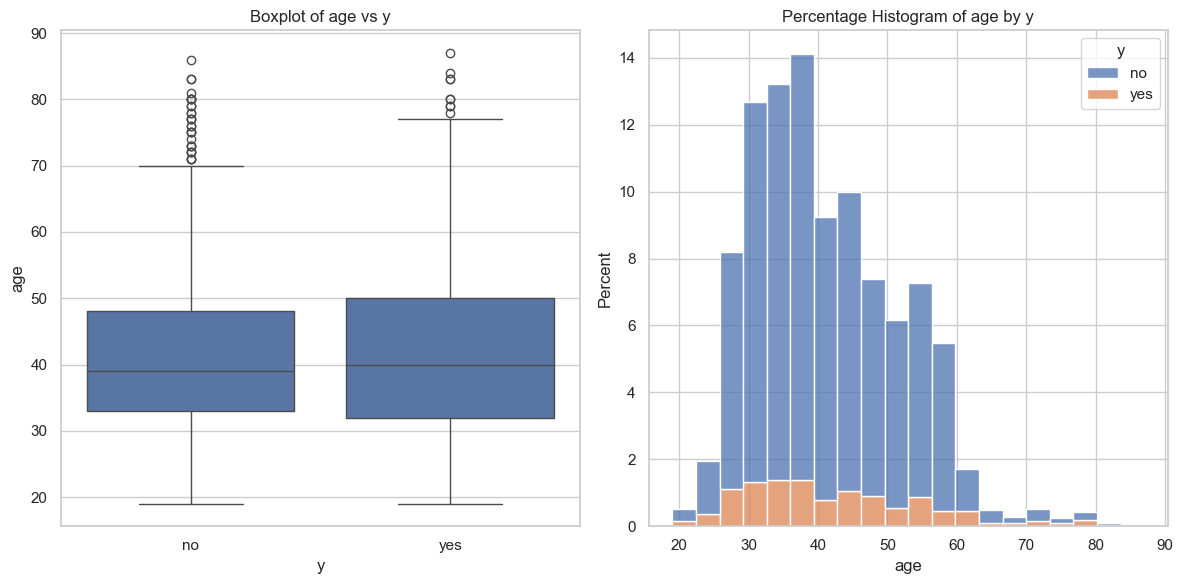

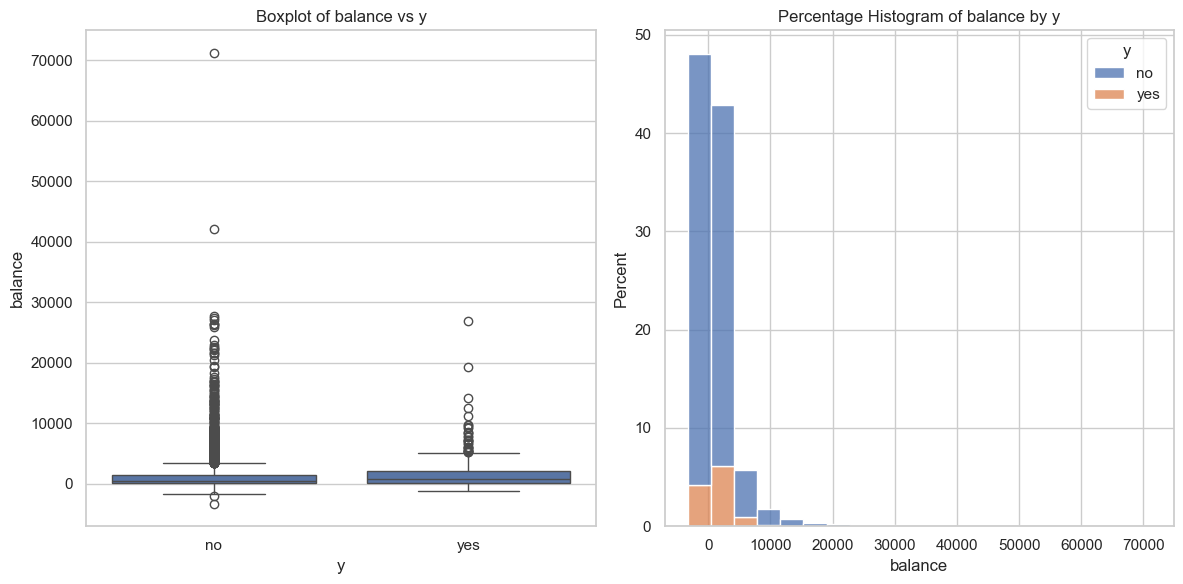

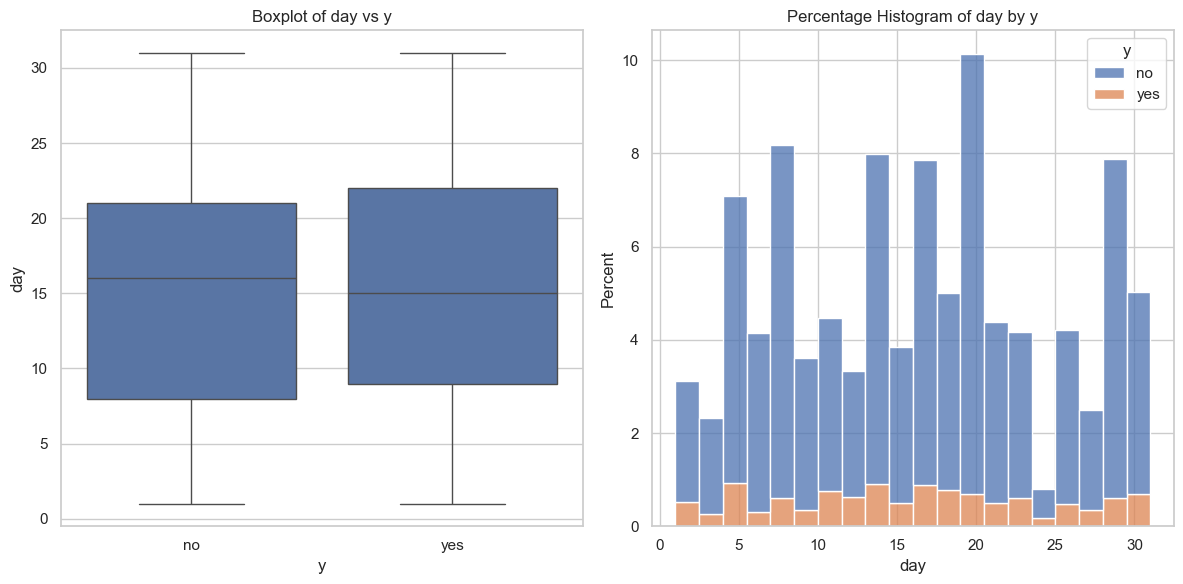

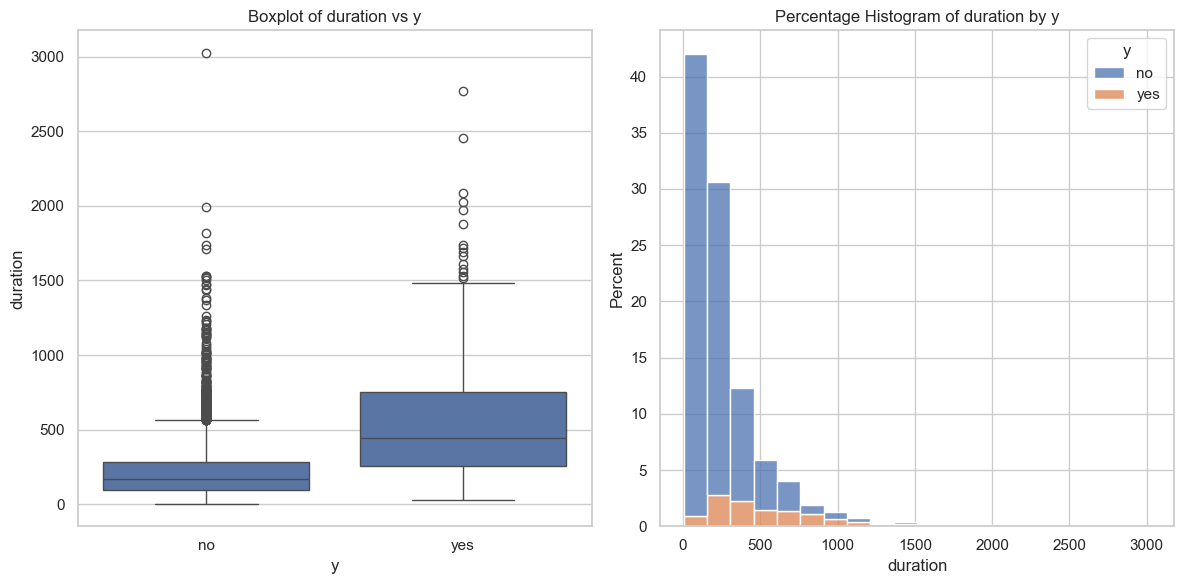

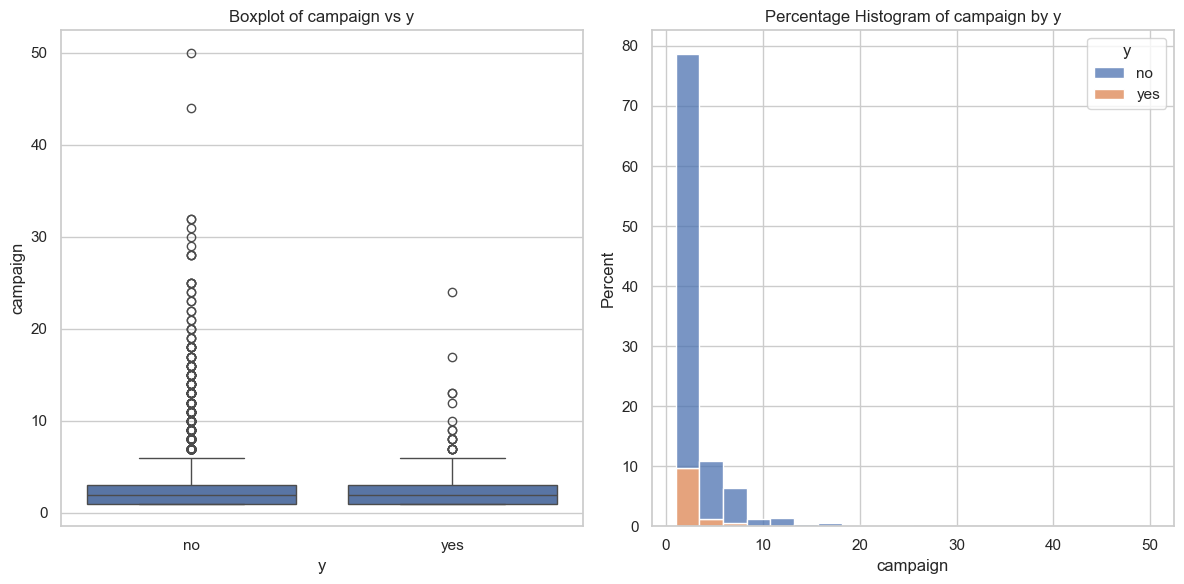

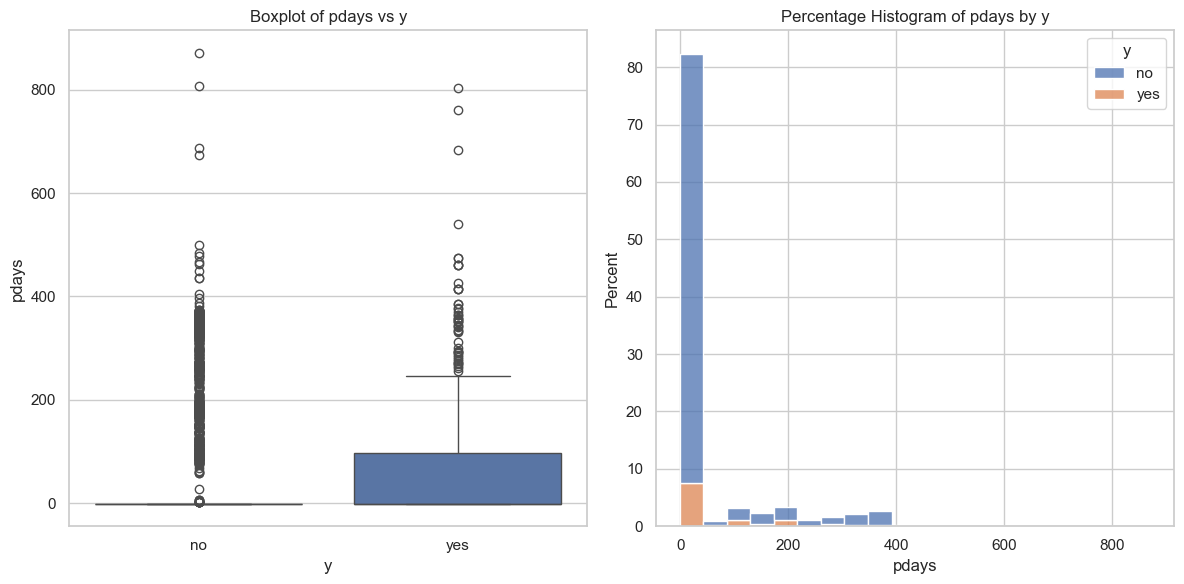

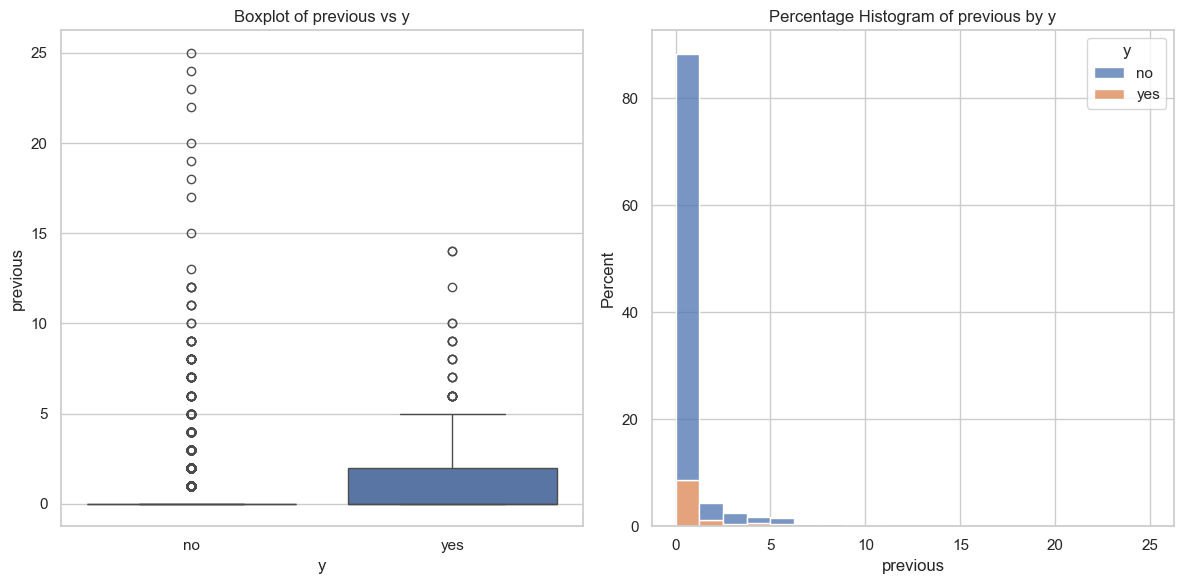

<Figure size 1000x600 with 0 Axes>

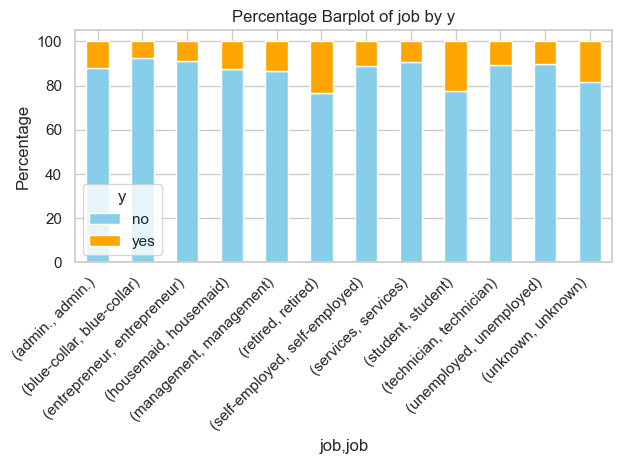

<Figure size 1000x600 with 0 Axes>

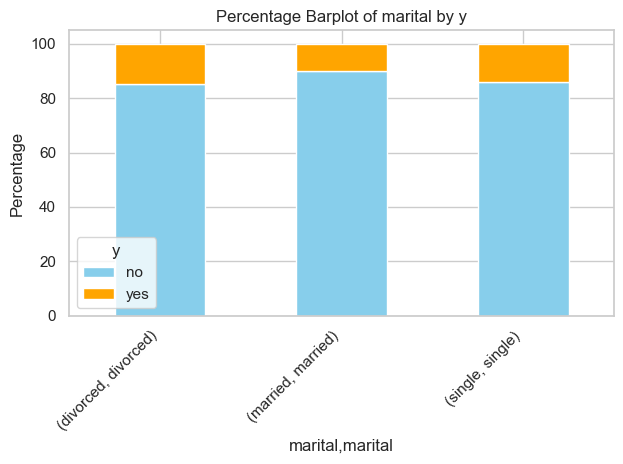

<Figure size 1000x600 with 0 Axes>

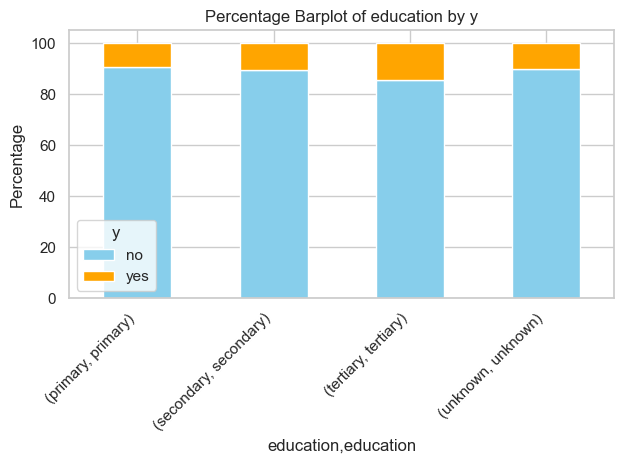

<Figure size 1000x600 with 0 Axes>

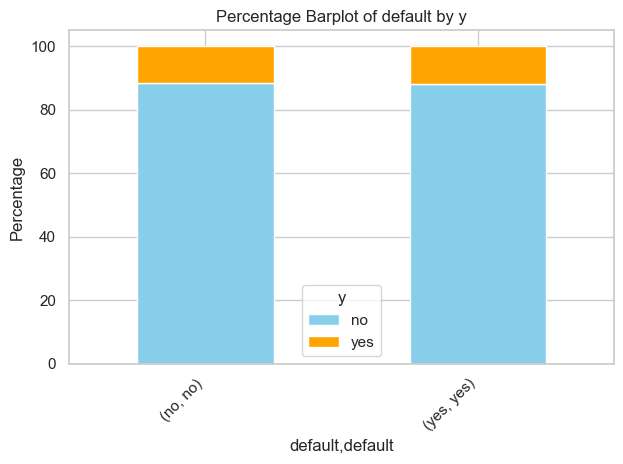

<Figure size 1000x600 with 0 Axes>

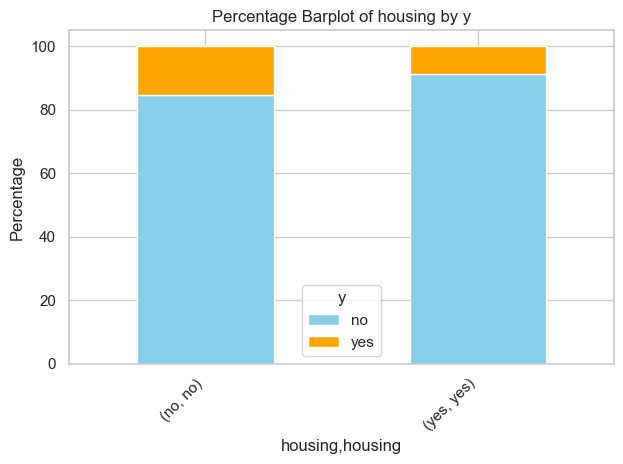

<Figure size 1000x600 with 0 Axes>

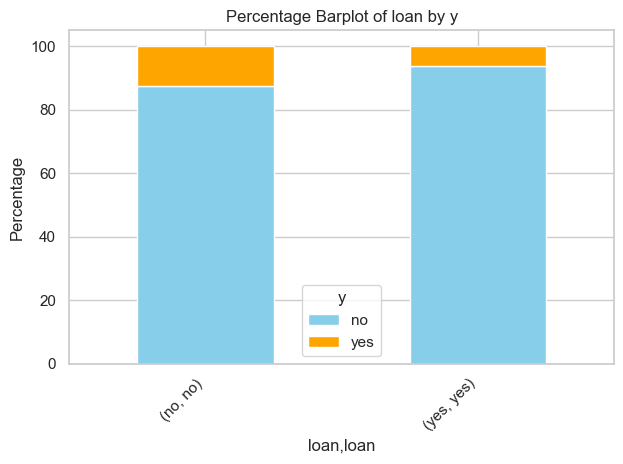

<Figure size 1000x600 with 0 Axes>

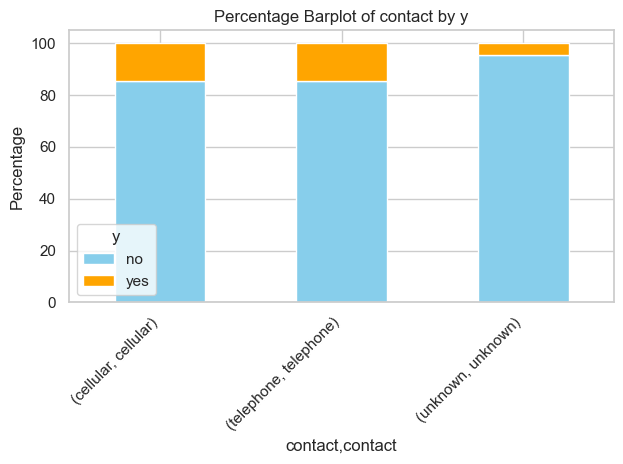

<Figure size 1000x600 with 0 Axes>

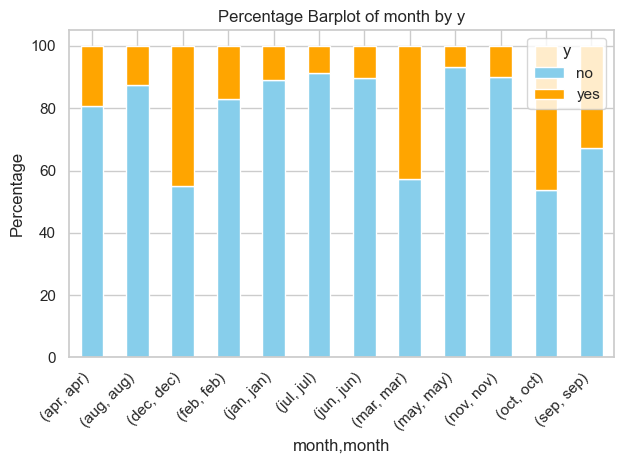

<Figure size 1000x600 with 0 Axes>

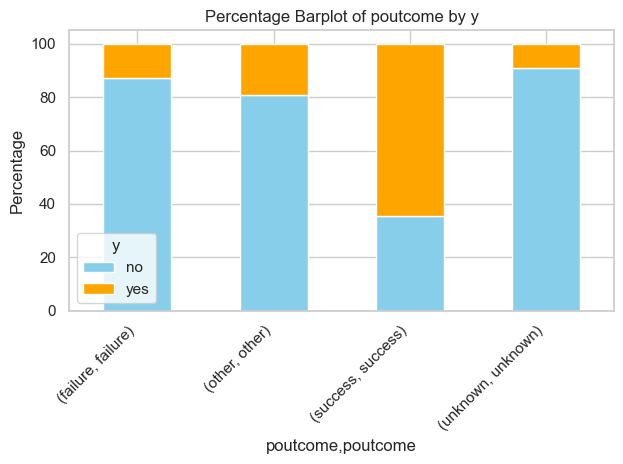

Correlation of numerical columns with target 'y':
 age         0.045092
balance     0.017905
day        -0.011244
duration    0.401118
campaign   -0.061147
pdays       0.104087
previous    0.116714
y_binary    1.000000
dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the target column 'y' to binary: 'yes' -> 1, 'no' -> 0
train_df['y_binary'] = train_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Numerical columns: boxplots and histograms with percentage
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    if col != 'y_binary':
        plt.figure(figsize=(12, 6))

        # Boxplot to show distribution for 'yes' and 'no' in 'y'
        plt.subplot(1, 2, 1)
        sns.boxplot(x='y', y=col, data=train_df)
        plt.title(f'Boxplot of {col} vs y')

        # Histogram to show distribution of the column with relative percentage
        plt.subplot(1, 2, 2)
        sns.histplot(data=train_df, x=col, hue='y', multiple='stack', bins=20, stat='percent')
        plt.title(f'Percentage Histogram of {col} by y')

        plt.tight_layout()
        plt.show()

# Categorical columns: barplots with percentages
categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('y')  # Exclude the target column 'y'

for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Create normalized (percentage) counts for each category
    category_percent = (
        train_df.groupby([col, 'y']).size()
        .groupby(level=0)
        .apply(lambda x: 100 * x / x.sum())
        .unstack()
    )
    
    # Plot as bar plot with percentages
    category_percent.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
    plt.title(f'Percentage Barplot of {col} by y')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

# Correlation of numerical columns with the target
correlation = train_df[numerical_columns].corrwith(train_df['y_binary'])
print("Correlation of numerical columns with target 'y':\n", correlation)


numerical: duration
        pdays
        previous
categorical: job, default, education, housing, loan, month, poutcome

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import numpy as np

In [23]:
# Define the selected categorical and numerical columns
categorical_columns = ['job', 'default', 'education', 'housing', 'loan', 'month', 'poutcome']  # Using 'default'
numerical_columns = ['duration', 'pdays', 'previous']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

# Define X and y
X = train_df.drop(columns=['y'])  # Assuming 'y' is the target column
y = train_df['y_binary']  # Converted 'y' to binary (1 for 'yes', 0 for 'no')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipelines for Logistic Regression and k-NN
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', KNeighborsClassifier())])

# Define parameter grid for Logistic Regression
param_grid_logreg = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'classifier__penalty': ['l1', 'l2'],  # Penalty terms
    'classifier__solver': ['liblinear', 'saga']  # Solvers that support l1 and l2
}

# Define parameter grid for k-NN
param_grid_knn = {
    'classifier__n_neighbors': [5, 7, 9, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform Grid Search for Logistic Regression
grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='f1')
grid_search_logreg.fit(X_train, y_train)

# Perform Grid Search for k-NN
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='f1')
grid_search_knn.fit(X_train, y_train)

# Output the best parameters and F1 scores for Logistic Regression and k-NN
print("Best Logistic Regression parameters:", grid_search_logreg.best_params_)
print("Best Logistic Regression F1 score:", grid_search_logreg.best_score_)

print("Best KNN parameters:", grid_search_knn.best_params_)
print("Best KNN F1 score:", grid_search_knn.best_score_)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best Logistic Regression parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Logistic Regression F1 score: 0.44032179254502307
Best KNN parameters: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best KNN F1 score: 0.2534296661413606


In [25]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Best parameters from the grid search
best_logreg_params = {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
best_knn_params = {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean'}

# Update the Logistic Regression pipeline with the best parameters
logreg_pipeline.set_params(classifier__C=best_logreg_params['C'],
                           classifier__penalty=best_logreg_params['penalty'],
                           classifier__solver=best_logreg_params['solver'])

# Update the KNN pipeline with the best parameters
knn_pipeline.set_params(classifier__n_neighbors=best_knn_params['n_neighbors'],
                        classifier__weights=best_knn_params['weights'],
                        classifier__metric=best_knn_params['metric'])

# Fit the pipelines on the training data
logreg_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)

# Predict the results on the test set
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_knn = knn_pipeline.predict(X_test)

# Predict the probabilities for the test set
y_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1 ('yes')
y_prob_knn = knn_pipeline.predict_proba(X_test)[:, 1]        # Probability of class 1 ('yes')

# Calculate metrics for Logistic Regression
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_precision = precision_score(y_test, y_pred_logreg)
logreg_recall = recall_score(y_test, y_pred_logreg)

# Calculate metrics for k-NN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)

# Print the results for Logistic Regression
print(f"Logistic Regression - Accuracy: {logreg_accuracy:.4f}, F1 Score: {logreg_f1:.4f}, Precision: {logreg_precision:.4f}, Recall: {logreg_recall:.4f}")

# Print the results for k-NN
print(f"KNN - Accuracy: {knn_accuracy:.4f}, F1 Score: {knn_f1:.4f}, Precision: {knn_precision:.4f}, Recall: {knn_recall:.4f}")



Logistic Regression - Accuracy: 0.8961, F1 Score: 0.4000, Precision: 0.5663, Recall: 0.3092
KNN - Accuracy: 0.8777, F1 Score: 0.2783, Precision: 0.4103, Recall: 0.2105


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

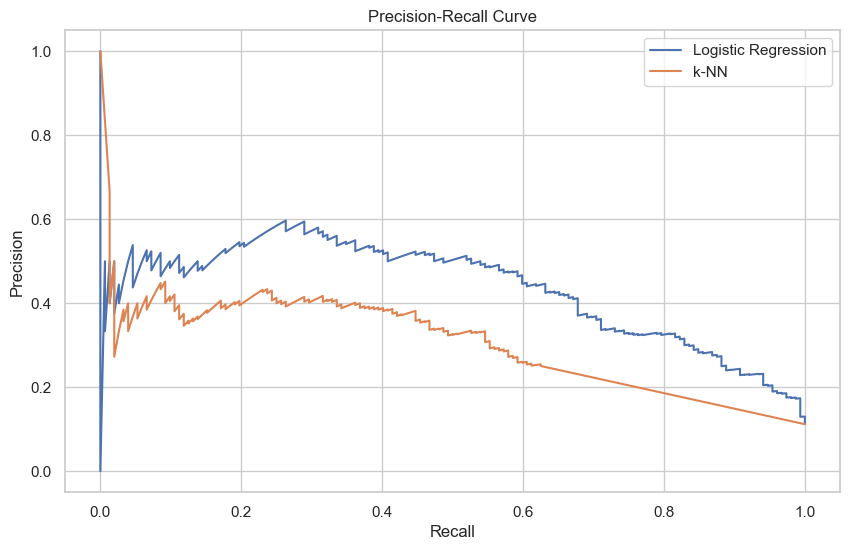

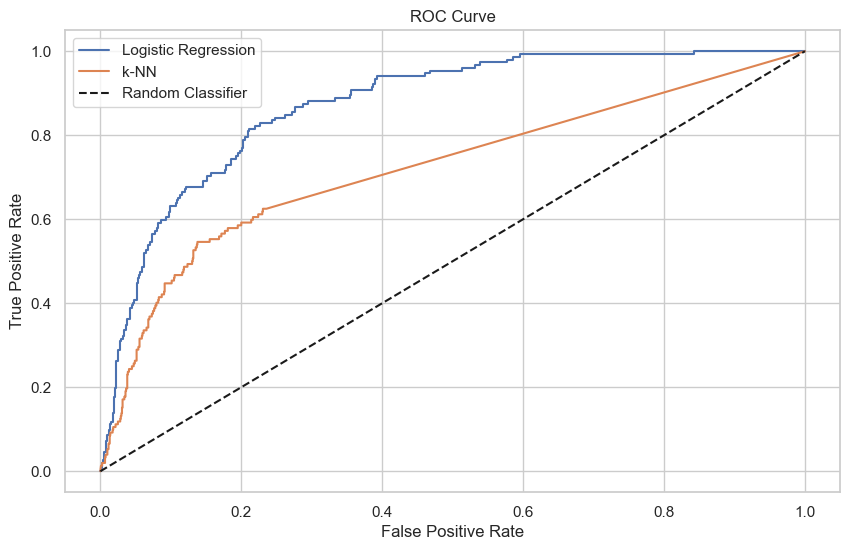

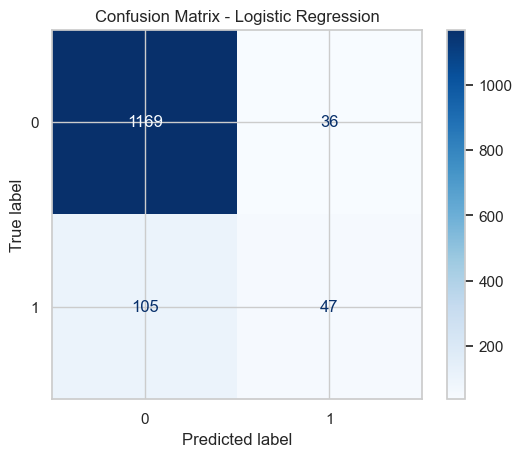

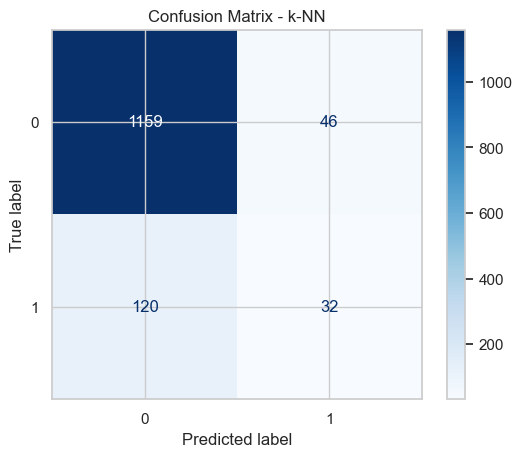

In [28]:
# ----- Precision-Recall Curve -----
precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_prob_logreg)
precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_prob_knn)

plt.figure(figsize=(10, 6))
plt.plot(recall_logreg, precision_logreg, label="Logistic Regression")
plt.plot(recall_knn, precision_knn, label="k-NN")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# ----- ROC Curve -----
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression")
plt.plot(fpr_knn, tpr_knn, label="k-NN")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ----- Confusion Matrix -----
# Confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(confusion_matrix=cm_logreg).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion matrix for k-NN
cm_knn = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(confusion_matrix=cm_knn).plot(cmap="Blues")
plt.title("Confusion Matrix - k-NN")
plt.show()